In [286]:
using DifferentialEquations, Plots, DataFrames, BenchmarkTools

In [287]:
function transcript_activ!(dydt, initial, params, t)

    k1, k2, k3, k4, k5, k6 = params

    Rt, iRtcR, RtiRtcR, RtcR, Rpc, RtcRRpc, Rpo = initial

    dRtdt, diRtcRdt, dRtiRtcRdt, dRtcRdt, dRpcdt, dRtcRRpcdt, dRpodt = zeros(length(dydt))

    dydt[1] = - k1*Rt*iRtcR + k2*RtiRtcR + k6*RtcRRpc
    dydt[2] = - k1*Rt*iRtcR + k2*RtiRtcR + k6*RtcRRpc
    dydt[3] = + k1*Rt*iRtcR - k2*RtiRtcR - k3*RtiRtcR
    dydt[4] = + k3*RtiRtcR - k4*RtcR*Rpc + k5*RtcRRpc
    dydt[5] = + k3*RtiRtcR - k4*RtcR*Rpc + k5*RtcRRpc
    dydt[6] = + k4*RtcR*Rpc - k5*RtcRRpc - k6*RtcRRpc 
    dydt[7] = + k6*RtcRRpc
end

transcript_activ! (generic function with 1 method)

In [288]:
k1 = 10
k2 = 10
k3 = 0.5
k4 = 10
k5 = 10
k6 = 0.5
params = [k1, k2, k3, k4, k5, k6]

Rt_0 = 1
iRtcR_0 = 1
RtiRtcR_0 = 0 
RtcR_0 = 0
Rpc_0 = 1
RtcRRpc_0 = 0
Rpo_0 = 0
init = [Rt_0, iRtcR_0, RtiRtcR_0, RtcR_0, Rpc_0, RtcRRpc_0, Rpo_0]

tspan = (0.0, 50.0)

(0.0, 50.0)

In [289]:
prob = ODEProblem(transcript_activ!,init,tspan,params);
sol = solve(prob, alg=AutoTsit5(Rosenbrock23()));


In [290]:
species = ["Rt" "iRtcR" "RtiRtcR" "RtcR" "Rpc" "RtcRRpc" "Rpo"]
species1 = [:Rt, :iRtcR, :RtiRtcR, :RtcR, :Rpc, :RtcRRpc, :Rpo];
solDF = DataFrame([[j[i] for j in sol.u] for i=1:length(sol.u[1])], species1);
Rt = solDF[!, :Rt];
iRtcR = solDF[!, :iRtcR];
RtiRtcR = solDF[!, :RtiRtcR];
RtcR = solDF[!, :RtcR];
Rpc = solDF[!, :Rpc];
RtcRRpc = solDF[!, :RtcRRpc];
Rpo = solDF[!, :Rpo];

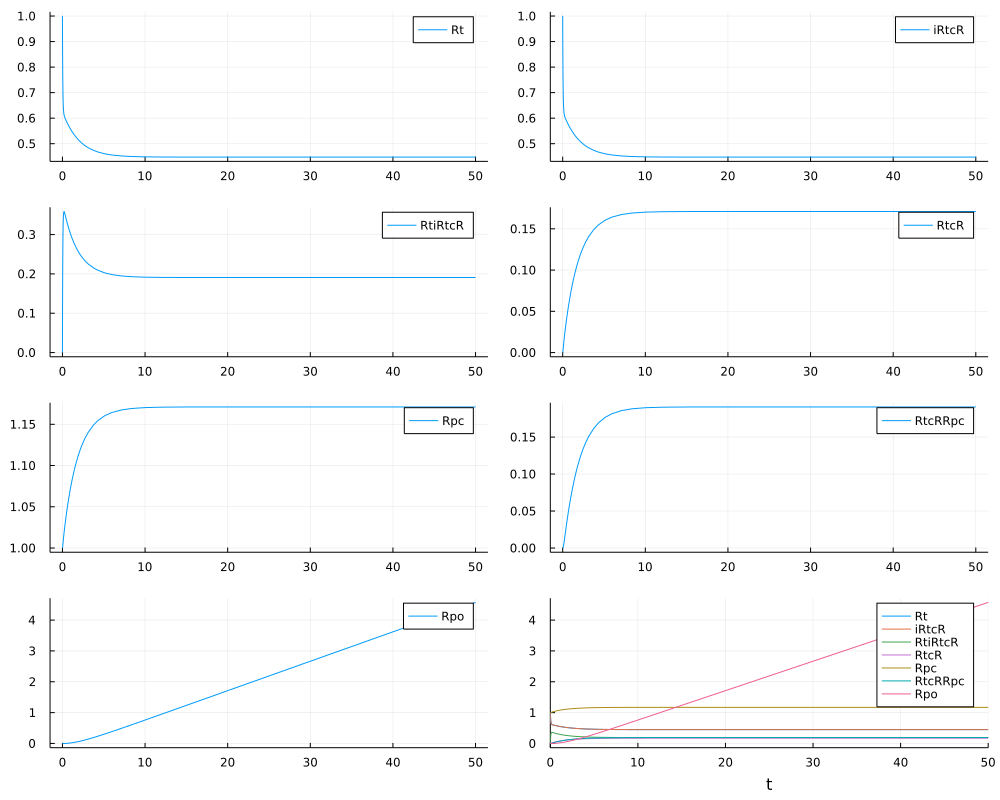

In [291]:
p1 = plot(sol.t, Rt, label="Rt")
p2 = plot(sol.t, iRtcR, label="iRtcR")
p3 = plot(sol.t, RtiRtcR, label="RtiRtcR")
p4 = plot(sol.t, RtcR, label="RtcR")
p5 = plot(sol.t, Rpc, label="Rpc")
p6 = plot(sol.t, RtcRRpc, label="RtcRRpc")
p7 = plot(sol.t, Rpo, label="Rpo")
p8 = plot(sol, label=species)
plot(p1, p2, p3, p4, p5, p6, p7, p8, layout=(4,2), size=(1000,800))

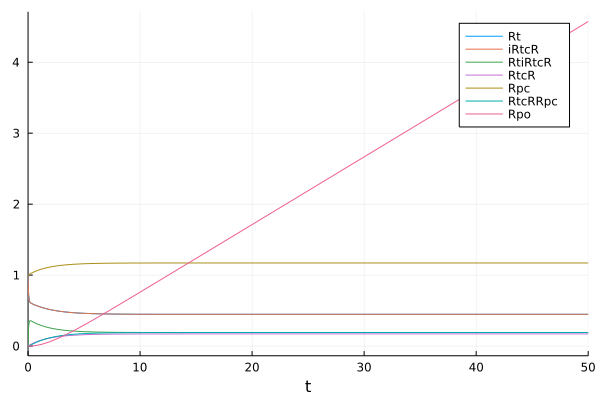

In [292]:
plot(sol, label=species)

In [293]:
function sp_func!(dydt, initial, params, t)

    k1, k2, k3, k4, k5, k6, RtcRtot = params

    Rt, iRtcR, RtiRtcR, RtcR, RtcRRpc, Rpc, Rpo = initial 

    dRtdt, diRtcRdt, dRtiRtcRdt, dRtcR, dRtcRRpcdt, dRpcdt, dRpodt  = zeros(length(dydt)) #diRtcRdt

    v = k6*Rpc*(RtcRtot-iRtcR)/(Rpc+(k5+k6)/k4)

    dydt[1] = - k1*Rt*iRtcR + k2*RtiRtcR + k6*RtcRRpc
    dydt[2] = - k1*Rt*iRtcR + k2*RtiRtcR + k6*RtcRRpc

    dydt[3] = + k1*Rt*iRtcR - k2*RtiRtcR - k3*RtiRtcR
    dydt[4] = + k3*RtiRtcR - k4*RtcR*Rpc + k5*RtcRRpc

    dydt[5] = + k4*RtcR*Rpc - k5*RtcRRpc - k6*RtcRRpc 


    dydt[6] = - v
    dydt[7] = + v 

end

sp_func! (generic function with 1 method)

In [294]:
RtcRtot = iRtcR_0 + RtiRtcR_0 + RtcRRpc_0;
new_params = [k1, k2, k3, k4, k5, k6, RtcRtot];
new_init = [Rt_0, iRtcR_0, RtiRtcR_0, RtcR_0, RtcRRpc_0, Rpc_0, Rpo_0];


In [295]:
prob1 = ODEProblem(sp_func!, new_init, tspan, new_params);
sol1 = solve(prob1, alg=AutoTsit5(Rosenbrock23()));

In [296]:
species3 = ["Rt" "iRtcR" "RtiRtcR" "RtcR" "RtcRRpc" "Rpc" "Rpo"]
species4 = [:Rt, :iRtcR, :RtiRtcR, :RtcR, :RtcRRpc, :Rpc, :Rpo];
solDF1 = DataFrame([[j[i] for j in sol1.u] for i=1:length(sol1.u[1])], species4);
Rt1 = solDF1[!, :Rt];
iRtcR1 = solDF1[!, :iRtcR];
RtiRtcR1 = solDF1[!, :RtiRtcR];
RtcR1 = solDF1[!, :RtcR];
Rpc1 = solDF1[!, :Rpc];
RtcRRpc1 = solDF1[!, :RtcRRpc];
Rpo1 = solDF1[!, :Rpo];

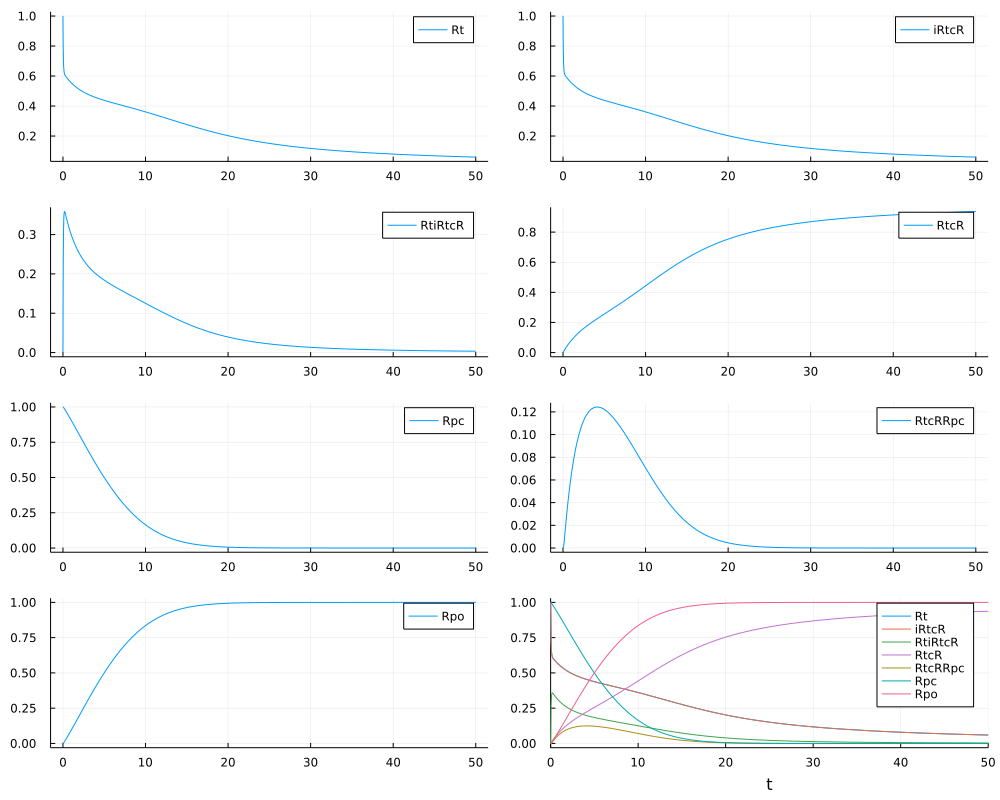

In [297]:
p1_1 = plot(sol1.t, Rt1, label="Rt")
p2_1 = plot(sol1.t, iRtcR1, label="iRtcR")
p3_1 = plot(sol1.t, RtiRtcR1, label="RtiRtcR")
p4_1 = plot(sol1.t, RtcR1, label="RtcR")
p5_1 = plot(sol1.t, Rpc1, label="Rpc")
p6_1 = plot(sol1.t, RtcRRpc1, label="RtcRRpc")
p7_1 = plot(sol1.t, Rpo1, label="Rpo")
p8_1 = plot(sol1, label=species3)
plot(p1_1, p2_1, p3_1, p4_1, p5_1, p6_1, p7_1, p8_1, layout=(4,2), size=(1000,800))

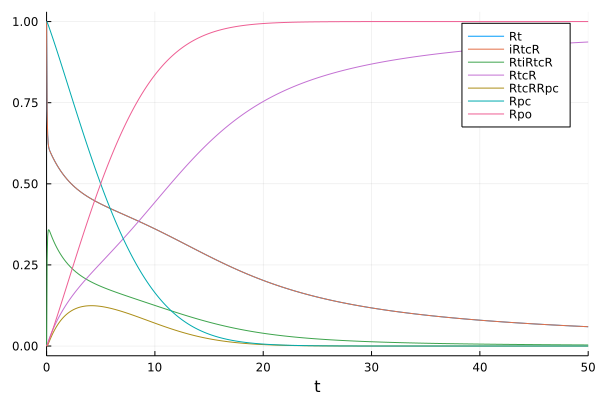

In [298]:
plot(p8_1)

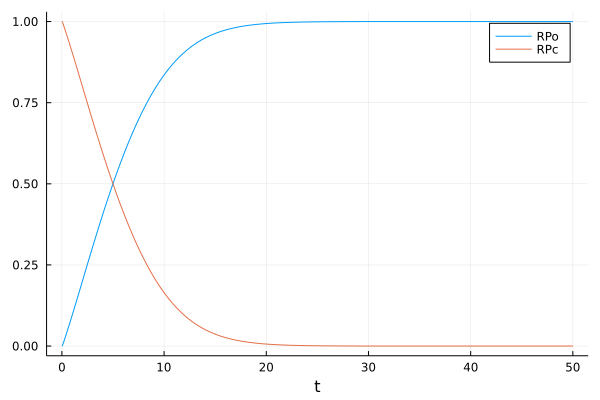

In [304]:
plot(xlabel="t")
plot!(sol1.t, Rpo1, label="RPo")
plot!(sol1.t, Rpc1, label="RPc")

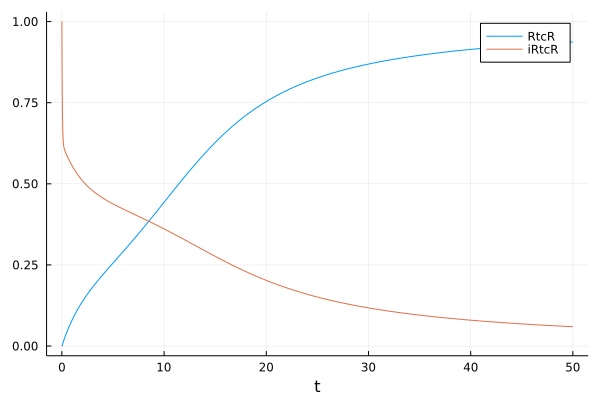

In [305]:
plot(xlabel="t")
plot!(sol1.t, RtcR1, label="RtcR")
plot!(sol1.t, iRtcR1, label="iRtcR")


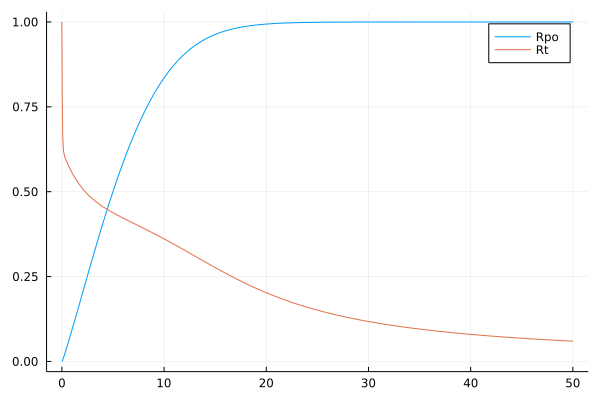

In [301]:
plot()
plot!(sol1.t, Rpo1, label="Rpo")
plot!(sol1.t, Rt1, label="Rt")


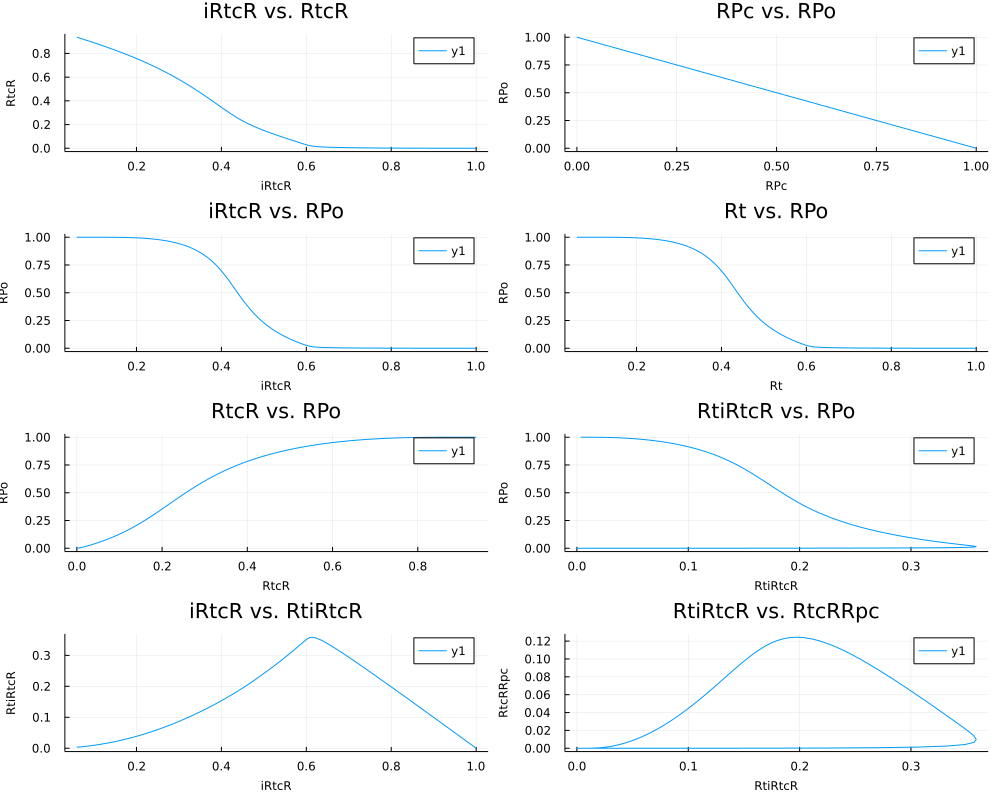

In [302]:
c1 = plot(iRtcR1, RtcR1, xlabel="iRtcR", ylabel="RtcR", title="iRtcR vs. RtcR", xlabelfontsize=8, ylabelfontsize=8)
c2 = plot(Rpc1, Rpo1, xlabel="RPc", ylabel="RPo", title="RPc vs. RPo", xlabelfontsize=8, ylabelfontsize=8)
c3 = plot(iRtcR1, Rpo1, xlabel="iRtcR", ylabel="RPo", title="iRtcR vs. RPo", xlabelfontsize=8, ylabelfontsize=8)
c4 = plot(Rt1, Rpo1, xlabel="Rt", ylabel="RPo", title="Rt vs. RPo", xlabelfontsize=8, ylabelfontsize=8)
c5 = plot(RtcR1, Rpo1, xlabel="RtcR", ylabel="RPo", title="RtcR vs. RPo", xlabelfontsize=8, ylabelfontsize=8)
c6 = plot(RtiRtcR1, Rpo1, xlabel="RtiRtcR", ylabel="RPo", title="RtiRtcR vs. RPo", xlabelfontsize=8, ylabelfontsize=8)
c7 = plot(iRtcR1, RtiRtcR1, xlabel="iRtcR", ylabel="RtiRtcR", title="iRtcR vs. RtiRtcR", xlabelfontsize=8, ylabelfontsize=8)
c8 = plot(RtiRtcR1, RtcRRpc1, xlabel="RtiRtcR", ylabel="RtcRRpc", title="RtiRtcR vs. RtcRRpc", xlabelfontsize=8, ylabelfontsize=8)

plot(c1, c2, c3, c4, c5, c6, c7, c8, layout=(4,2), size=(1000,800))